In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns

In [2]:
df=pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')
df_n=df.copy()

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [5]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [6]:
df1=df.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
scaler = StandardScaler()
df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


# TASK2

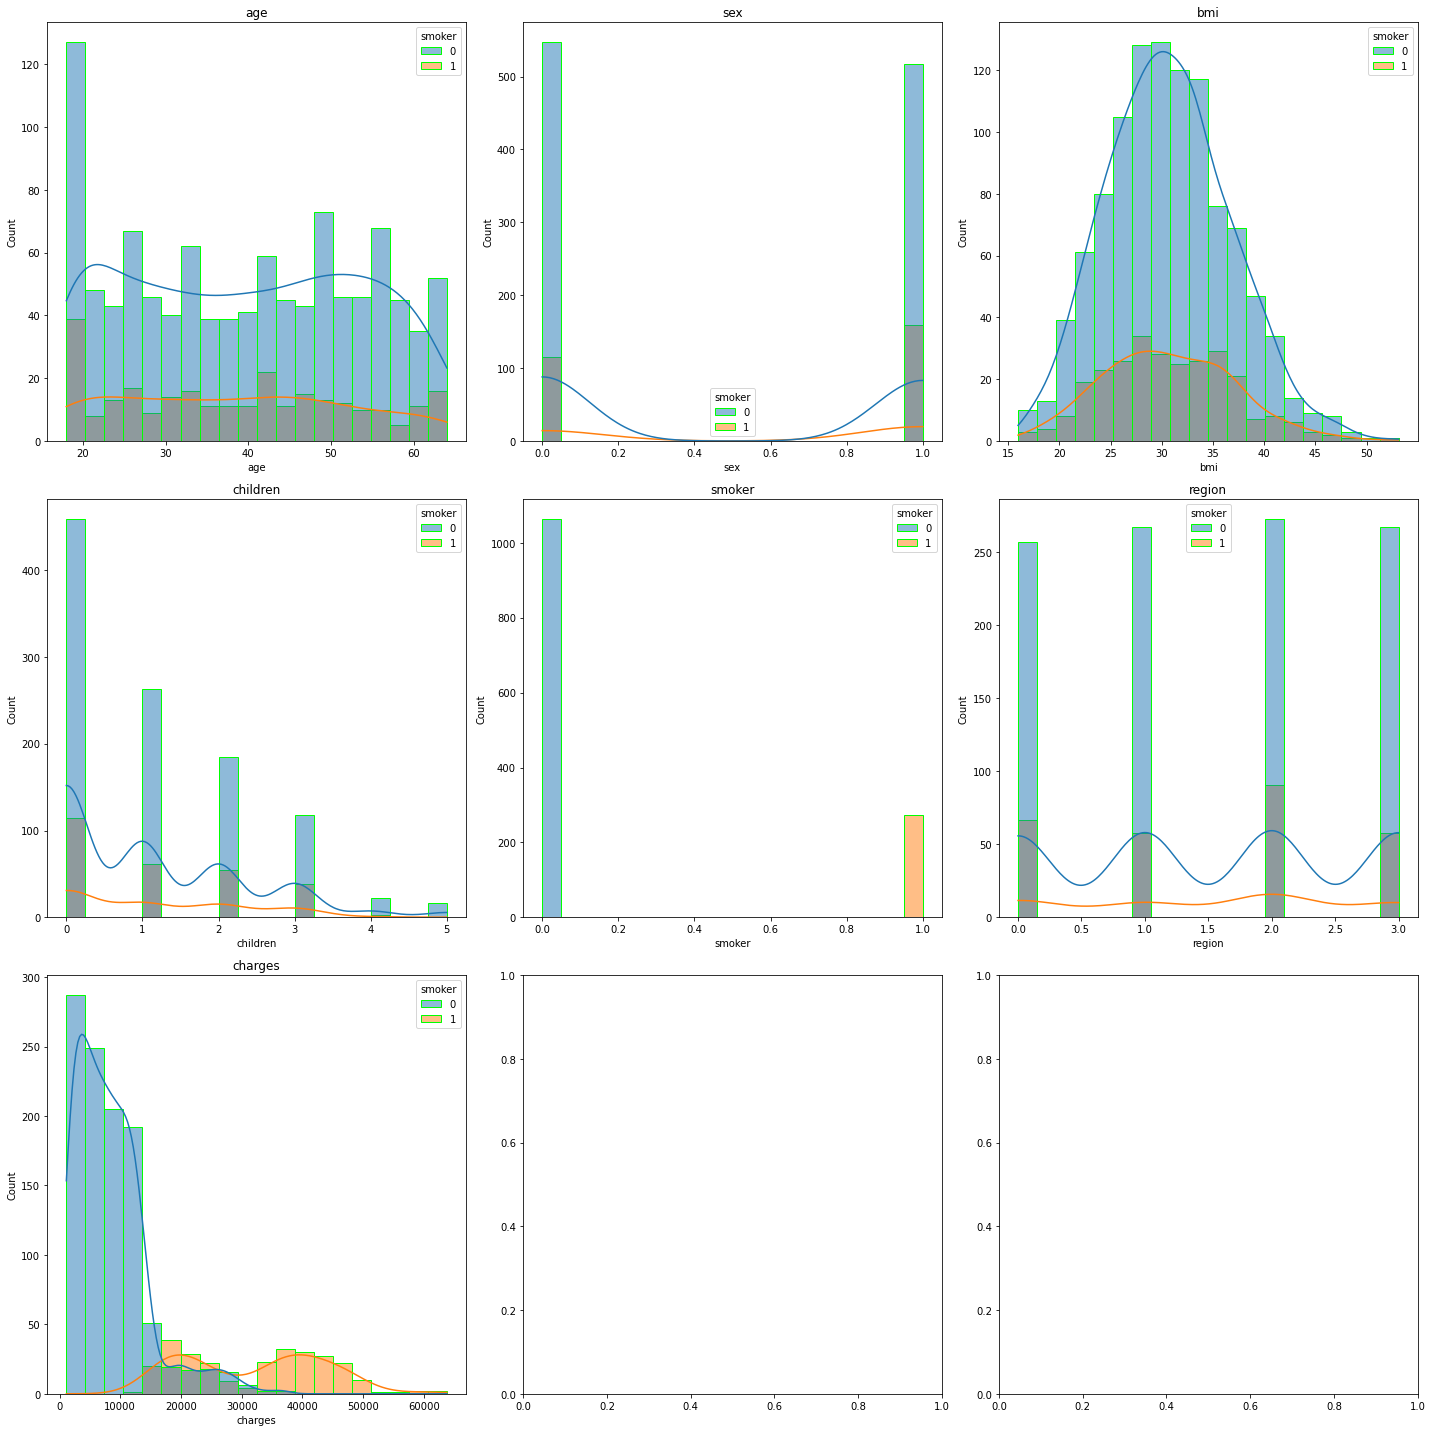

In [9]:
numerics=['int16','int32','int64','float16','float32','float64']
con_df=df1.select_dtypes(include=numerics)
con_cols=con_df.columns
num_cols=3
n_bins=20
num_rows=int(len(con_cols)/num_cols)+1

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,20))

for col ,ax in zip(con_cols,axes.flatten()[:len(con_cols)]):
    sns.histplot(data=con_df,x=col,bins=n_bins,kde=True,ax=ax,color='tan',edgecolor='lime',hue='smoker')
    ax.set_title(col)
plt.show()

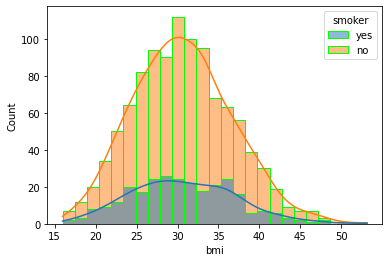

In [74]:
sns.histplot(data=df_n,x='bmi',kde=True,color='tan',edgecolor='lime',hue='smoker')
plt.show()

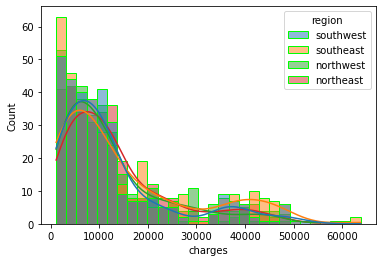

In [76]:
sns.histplot(data=df_n,x='charges',kde=True,color='tan',edgecolor='lime',hue='region')
plt.show()

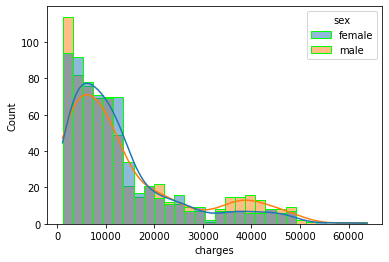

In [78]:
sns.histplot(data=df_n,x='charges',kde=True,color='tan',edgecolor='lime',hue='sex')
plt.show()

# TASK3

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2)

In [12]:
pca.fit(df)

PCA(n_components=2)

In [13]:
pca.transform(df)

array([[ 0.86550954,  0.81208251],
       [-1.13864807, -0.24489118],
       [-0.7053086 , -0.64142346],
       ...,
       [-1.31718035, -0.46139248],
       [-1.58050269,  0.10570459],
       [ 2.28660847,  0.72035023]])

In [14]:
principal_component = pca.fit_transform(df)

Text(0, 0.5, 'Second principal component')

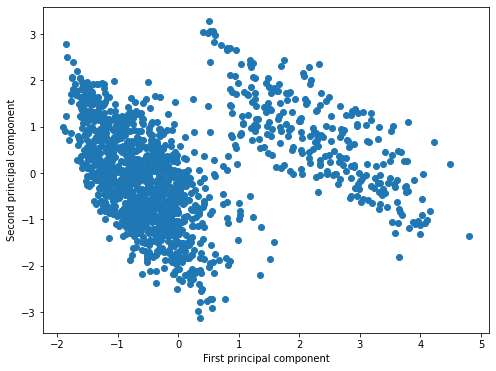

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(principal_component[:,0], principal_component[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

Text(0, 0.5, 'Variance Explained')

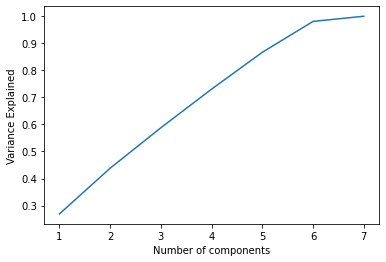

In [16]:
explained_variance = []
for n in range (1,8):
    pca = PCA(n_components = n)
    pca.fit(df)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,8), explained_variance )
plt.xlabel('Number of components')
plt.ylabel('Variance Explained')

# TASK 4

# For AgglomerativeClustering

In [17]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def f(F1,F2,dimension_reduction='pca',components=2):
    scaled_values = scaler.fit_transform(df1)
    X_l=df1.iloc[:, 0:7].values
    y_l=df1.iloc[:, 6].values
    components = min(components, len(df1.columns))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    values = pd.DataFrame(values)
    X=values
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    X = np.array(X)
    plt.figure(figsize=(20,10))
    plt.scatter(X[y_hc == 0, F1], X[y_hc == 0, F2], s = 50, c = 'red')
    plt.scatter(X[y_hc == 1,F1], X[y_hc == 1, F2], s = 50, c = 'blue')
    plt.scatter(X[y_hc == 2,F1], X[y_hc == 2, F2], s = 50, c = 'green')
    plt.scatter(X[y_hc == 3, F1], X[y_hc == 3, F2], s = 50, c = 'cyan')
    plt.scatter(X[y_hc == 4, F1], X[y_hc == 4, F2], s = 50, c = 'magenta')
    plt.title('Clusters')
    plt.xlabel('Price_in_thousands')
    plt.ylabel('Power_perf_factor')
    plt.show()

interactive_plot = interactive(f,F1=(0, 7,1), F2=(0, 7, 1), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),  ('without', None)],
                                                       description='Dimensionality Reduction',
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
                              components=widgets.SelectionSlider(options=range(2, 8), value=7,description='PCA components',
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=3, description='F1', max=7), IntSlider(value=3, description='F2', max=7)…

### To find the value of e and min sample

In [81]:
import warnings
warnings.filterwarnings("ignore")

eps=.04
for min_samples in range(2,5,1):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('\n','eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)


 eps= 0.04 | min_samples=  2 | obtained clustering:  [(1, 1314), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2)]

 eps= 0.04 | min_samples=  3 | obtained clustering:  [(1, 1338)]

 eps= 0.04 | min_samples=  4 | obtained clustering:  [(1, 1338)]


In [82]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['smoker','charges']])
distances, indices = nbrs.kneighbors(df[['smoker','charges']])

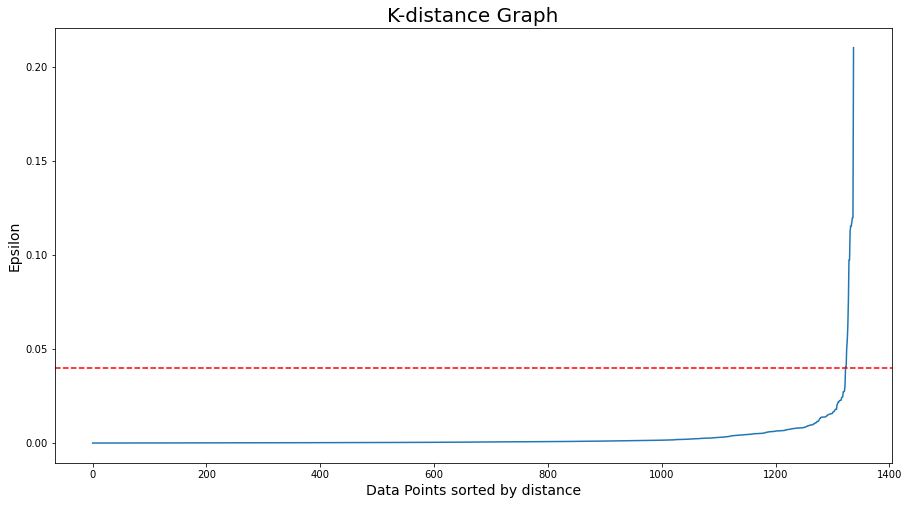

In [83]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=.04, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# FOR DBSCAN

In [71]:
import matplotlib.colors as mcolors
i = mcolors.CSS4_COLORS
colors = []
for  col in i:
    colors.append(col)
colors = colors[11:30]

def f(F1,F2,dimension_reduction='pca',components=2):
    scaled_values = scaler.fit_transform(df1)
    X_l=df1.iloc[:, 0:7].values
    y_l=df1.iloc[:, 6].values
    components = min(components, len(df1.columns))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    values = pd.DataFrame(values)
    dbscan_opt=DBSCAN(eps=4, min_samples=4)
    dbscan_opt.fit(values)
    values['DBSCAN_opt_labels']=dbscan_opt.labels_
    
    
    dbscan_opt=DBSCAN(eps=.04, min_samples=2)
    dbscan_opt.fit(values)
    values['DBSCAN_opt_labels']=dbscan_opt.labels_

    plt.figure(figsize=(15,7))

    plt.scatter(values.iloc[:,F1],values.iloc[:,F2], c=values['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    plt.show()
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']))

interactive_plot = interactive(f, F1=(0, 7,1), F2=(0, 7, 1),    dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),  ('without', None)],
                                                       description='Dimensionality Reduction',
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
                              components=widgets.SelectionSlider(options=range(2,8), value=7,description='PCA components',
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=3, description='F1', max=7), IntSlider(value=3, description='F2', max=7)…